___

# Machine Learning in Geosciences ] 
Department of Applied Geoinformatics and Carthography, Charles University

Lukas Brodsky lukas.brodsky@natur.cuni.cz


## Exercise: apply different ML algorithms to different classification problems


Purpose: explore selected classification algoritms based on simulated synthetic data set. 


# Setup

In [1]:
# Common imports for reading, visualizing
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data preparattion 
from sklearn.datasets import make_classification # make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

from sklearn.model_selection import train_test_split

# Classifiers: 

# LINEAR
from sklearn.linear_model import LogisticRegression
# TREES
from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# SVM 
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
# ANN 
from sklearn.neural_network import MLPClassifier

# Accuracy assesment 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.inspection import DecisionBoundaryDisplay

# tuning -> manual, so far 

# to make this notebook's output stable across runs
np.random.seed(42)


## Get the simulated data


### Data set 1

In [155]:
# create synthetic data set 1
X1, y1 = make_classification(n_samples = 1000, n_features = 10, n_informative = 5, n_redundant = 5, 
                          class_sep = 3, n_clusters_per_class=1, 
                          random_state = 42, shuffle = True) 

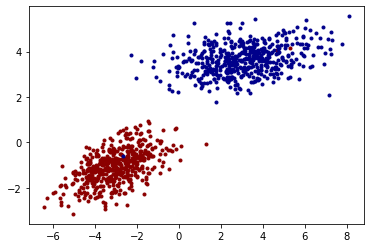

In [156]:
plt.plot(X1[(y1==0),0], X1[(y1==0),1], '.', color='DarkRed')
plt.plot(X1[(y1==1),0], X1[(y1==1),1], '.', color='DarkBlue')

In [ ]:
# Numpy array to pandas dataframe
# features = [f"Feature {ii+1}" for ii in range(X1.shape[1])]
# X1 = pd.DataFrame(X1, columns = features)
# y1 = pd.DataFrame(y1, columns = ["Target"])

In [12]:
X1.shape

(1000, 10)

In [13]:
y1.shape

(1000,)

### Data set 2

In [112]:
X2, y2 = make_moons(n_samples=1000,  noise=0.2)


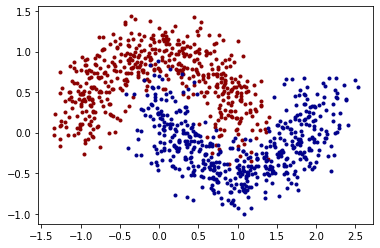

In [131]:
plt.plot(X2[(y2==0),0], X2[(y2==0),1], '.', color='DarkRed')
plt.plot(X2[(y2==1),0], X2[(y2==1),1], '.', color='DarkBlue')

In [ ]:
# Numpy array to pandas dataframe
# features = [f"Feature {ii+1}" for ii in range(X3.shape[1])]
# X2 = pd.DataFrame(X2, columns = features)
# y2 = pd.DataFrame(y2, columns = ["Target"])

In [158]:
X1.shape

(1000, 10)

## Create train and test set    

In [159]:
# test 20 % 
# train_test_split(X, y, test_size=0.2, random_state=42) 
X_train, X_test, y_train, y_test = train_test_split(X1[:,0:2], y1, test_size=0.2, random_state=42) 
# X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42) 

In [160]:
X_train.shape

(800, 2)

In [161]:
y_train.shape

(800,)

## Select clasifiers & instantiate, set hyperparameters 

In [162]:
# instantiate classifiers 

# 1. Linear SVM (suppor vector classifier) 
# PARAMS: C = 0.01, 0.1, 1.0, 10, 100
model = SVC(kernel="linear", gamma="auto", C = 10) 

# 2. Non-linear SVM (suppor vector classifier) 
# PARAMS: kernel = "linear", "rbf", "poly"
#         gamma = "auto"
#         C = 0.1, 0.5, 1, 5, 10, 50, 100 
# model = SVC(kernel="rbf", gamma="auto", C = 10) 

# 3. MLP ANN - MLPClassifier() 
# PARAMS: hidden_layer_sizes = 3, 10, 20
#         max_iter = 100
# model = MLPClassifier(hidden_layer_sizes = 3, max_iter = 100) 

## Fit model

In [163]:
# NOT model.fit(X_train, y_train)
model.fit(X_train, y_train)

SVC(C=10, gamma='auto', kernel='linear')

## Evaluate the model(s)

In [164]:
# model training - cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


In [165]:
# testing the model 
model.score(X_test, y_test)

0.99

## Plot decision boundary

In [173]:
# create feature1, 2 from X 
feature_1, feature_2 = np.meshgrid(
     np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 1000),
     np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 1000)
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

In [175]:
y_pred = np.reshape(model.predict(grid), feature_1.shape)

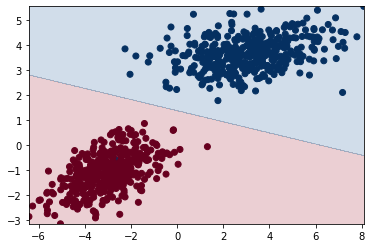

In [177]:
# display data with boundary
display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot(cmap=plt.cm.RdBu, alpha=0.2)
display.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolor=None)
plt.show()

In [ ]:
# 1/ Which model works well for the data set 1 and 2? 

In [ ]:
# 2/ Change class_sep = 1 for data set 1 and evaluate models performance

In [ ]:
# 3/ Change noise=0.3 for data set 2 and evaluate models performance